In [1]:
import os

import seaborn as sns
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.layers import *
from keras.models import *
from keras.regularizers import l2
from keras.preprocessing import image
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

2023-04-25 15:46:21.637445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Data Links for this project can be found at --> https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia

This dataset contains ~2GB of normal and positive pre-labeled images

These images were downloaded locally, and separated into Data/{train/test/val}/{POSITIVE/NEGATIVE} directories in this project

The metadata for images in this project can be found at --> https://github.com/ieee8023/covid-chestxray-dataset/blob/master/metadata.csv

In [2]:
TRAIN_PATH = 'data/train/'
TEST_PATH = 'data/test/'
VAL_PATH = 'data/val/'

In [3]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

2023-04-25 15:46:24.489409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data_format = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)


train_data = data_format.flow_from_directory(
    TRAIN_PATH,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)

val_data = data_format.flow_from_directory(
    VAL_PATH,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)

test_data = data_format.flow_from_directory(
    TEST_PATH,
    target_size=(256,256),
    class_mode='binary'
)

train_data.class_indices
val_data.class_indices
test_data.class_indices

Found 1450 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


{'NEGATIVE': 0, 'POSITIVE': 1}

In [5]:
train_history = model.fit(
    train_data,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = val_data,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 15s 2s/step - loss: 0.6867 - accuracy: 0.5742 - val_loss: 0.6677 - val_accuracy: 0.5781
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 0.6389 - accuracy: 0.5977 - val_loss: 0.6386 - val_accuracy: 0.5312
Epoch 3/10
8/8 [==============================] - 14s 2s/step - loss: 0.5603 - accuracy: 0.6068 - val_loss: 0.5736 - val_accuracy: 0.5156
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 0.3693 - accuracy: 0.8203 - val_loss: 0.3071 - val_accuracy: 0.8125
Epoch 5/10
8/8 [==============================] - 14s 2s/step - loss: 0.2507 - accuracy: 0.9219 - val_loss: 0.1729 - val_accuracy: 0.9375
Epoch 6/10
8/8 [==============================] - 12s 2s/step - loss: 0.3187 - accuracy: 0.8932 - val_loss: 0.2255 - val_accuracy: 0.9531
Epoch 7/10
8/8 [==============================] - 14s 2s/step - loss: 0.3115 - accuracy: 0.9062 - val_loss: 0.1625 - val_accuracy: 0.9219
Epoch 8/10
8/8 [==================

In [10]:
probabilities = model.predict(test_data)

predicted_labels = [1 if x >= 0.5 else 0 for x in probabilities]
actual_labels = test_data.classes

confusion_matrix(actual_labels, predicted_labels)

2/2 [==============================] - 2s 397ms/step


array([[22,  8],
       [ 9, 11]])

Accuracy:  0.66



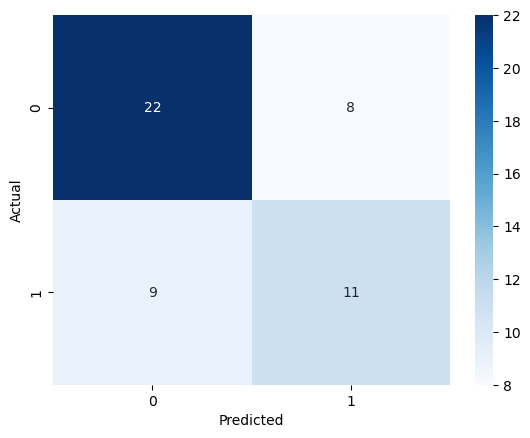

In [11]:
matrix = confusion_matrix(actual_labels, predicted_labels)

print("Accuracy: ", accuracy_score(actual_labels, predicted_labels))
print()

sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Predicted Label:  POSITIVE with probability: [90.40031] %
Actual Label:  POSITIVE


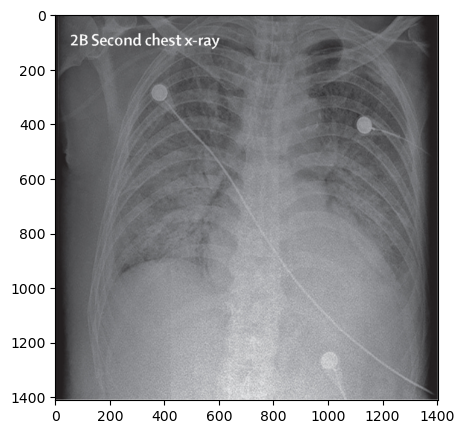

In [12]:
random_dir = np.random.randint(0,2)
if random_dir == 0:
    PATH = 'Data/test/POSITIVE/'
    label = 'POSITIVE'
    len = 20
else: 
    PATH = 'Data/test/NEGATIVE/'
    label = 'NEGATIVE'
    len = 30


image_index = np.random.randint(0,len)
image = os.listdir(PATH)[image_index]

predicted_labels = ['POSITIVE' if x >= 0.5 else 'NEGATIVE' for x in probabilities]

print("\nPredicted Label: ", predicted_labels[image_index], "with probability:", probabilities[image_index] * 100, "%")
print("Actual Label: ", label)

plt.figure(figsize=(5,5))
plt.imshow(Image.open(PATH + image))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0